# NBA Player Position Classification

**In this project, I will be looking at using NBA player statistics to determine the position of the player based on the statistics.**


In the NBA there are five players on a team on the court with five different positions:

1. Point Guard
2. Shooting Guard
3. Small Forward
4. Power Forward
5. Centre

Historically, a player is assigned to a position defined by the role that they play on the court. 


- The point guard is the "leader" of the team on the court. This position requires substantial ball-handling skills and the ability to facilitate the team during a play and a good long range shooter.

- The shooting guard, as the name implies, is often the best shooter, as well as being capable of shooting accurately from longer distances.

- The small forward often has an aggressive approach to the basket when handling the ball. The small forward is also known to make cuts to the basket in efforts to get open for shots. 

- The power forward and the center make up the frontcourt, often acting as their team's primary rebounders or shot blockers, or receiving passes to take inside shots. The center is typically the larger of the two.

As you can see, a position requires a specific trait of skills needed to excel at that position. 

- Typically, the point guard will excel in assisting others and creating their own shots.

- The shooting guard is commonly known for their ability to shoot the ball well from mid range and beyond. Along with the small forward, the shooting guard often referred to as a wing because of its use in common positioning tactics 

- The small forward is versatile as their role resembles that of a shooting guard more often than that of a small forward. This is why the small forward and shooting guard positions are often used interchangeably and referred to as wings, although the shooting guard position can also be some what interchangeable with the point guard too. A common thread among small forwards is an ability to draw fouls by aggressively attempting (posting-up) to finish at the rim. As such, accurate foul shooting is also a common skill for small forwards as well as shooting from range.

- A power forward often plays a role similar to that of the center, down in the "post" or "low blocks". The power forward  scores close to the basket while also being able to shoot mid-range jump shots from 10 – 15 feet from the basket.

- The centre usually plays near the baseline or close to the basket (the "low post"). They are usually the tallest players on the floor. Centers usually score "down low", or "in the paint" (near the basket, in the key), but there have been many centers who are good perimeter shooters as well. They're typically skilled at pulling down rebounds, contesting shots and setting screens on players.

Hence, the player's statistic should be different for each position as they will excel in their respective positions and put up better statistics in different categories. Therefore, creating a classification model to determine which position a player plays in should be achievable. However, it is not that simple as these are traditional basketball roles and which are assigned to players but nowadays, a player may not restrict their play style to their positions. 

An example of this would be Stephen Curry and Kyrie Irving who are point guards that play more like shooting guards as they tend to score more than assist. Additionally, there are centres like Joel Embiid who shoot the ball well from mid range and from beyond the three point line that they do not play the traditional centre role. Finally, you have players like LeBron James who do it all, and could play any position. So it may be difficult to group a player based on their statistics, but it is worth a shot.

Based on the description of each position, I am inclined to group the the positions by point guard as one position, the small forward and the shooting guard as another, and finally the centre and the power forward as one. I will do some EDA to look at how each stat changes by position and perhaps group it differently if need be. 

**Table of Contents**
1. Scrape Data
2. Data Exploration and Data Cleansing
3. Feature Engineering
4. Exploratory Data Analysis
5. Model

In [1]:
'''Data Analytics'''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

'''Web scraping'''
import requests
from bs4 import BeautifulSoup

'''ML'''
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

## 1. Scrape Data

In [2]:
years = list(range(1980,2023))
players = []

for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # player table class
    player_stats = soup.find(id="per_game_stats")

    # use pandas to read the whole table in
    player_stats = pd.read_html(str(player_stats))[0]
    player_stats['Year'] = year
    players.append(player_stats)
    
df = pd.concat(players, axis=0, ignore_index=True)

In [3]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980


In [4]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [5]:
df.shape

(23359, 31)

## 2. Data Exploration and Data Cleansing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23359 entries, 0 to 23358
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      23359 non-null  object
 1   Player  23359 non-null  object
 2   Pos     23359 non-null  object
 3   Age     23359 non-null  object
 4   Tm      23359 non-null  object
 5   G       23359 non-null  object
 6   GS      22686 non-null  object
 7   MP      23359 non-null  object
 8   FG      23359 non-null  object
 9   FGA     23359 non-null  object
 10  FG%     23242 non-null  object
 11  3P      23359 non-null  object
 12  3PA     23359 non-null  object
 13  3P%     19594 non-null  object
 14  2P      23359 non-null  object
 15  2PA     23359 non-null  object
 16  2P%     23169 non-null  object
 17  eFG%    23242 non-null  object
 18  FT      23359 non-null  object
 19  FTA     23359 non-null  object
 20  FT%     22354 non-null  object
 21  ORB     23359 non-null  object
 22  DRB     23359 non-null

In [7]:
df.isnull().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS         673
MP           0
FG           0
FGA          0
FG%        117
3P           0
3PA          0
3P%       3765
2P           0
2PA          0
2P%        190
eFG%       117
FT           0
FTA          0
FT%       1005
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
dtype: int64

In [8]:
df[df['Pos'] == 'Pos']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
26,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1980
51,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1980
78,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1980
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1980
128,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23245,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022
23274,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022
23299,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022
23326,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022


In [9]:
df = df[df['Pos'] != 'Pos']

In [10]:
df.shape

(22467, 31)

In [11]:
for i, col_name in enumerate(df.columns):
    if df.isnull().sum()[i] > 0:
        print(f'{col_name}: {round((df.isnull().sum()[i] / df.shape[0]) * 100, 2) }% missing values')

GS: 3.0% missing values
FG%: 0.52% missing values
3P%: 16.76% missing values
2P%: 0.85% missing values
eFG%: 0.52% missing values
FT%: 4.47% missing values


In [12]:
23359 * 0.167

3900.9530000000004

- 16% of data with at least NULL. Drop values as they are almost 4000 rows out of 23000.

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64

- Cleaned

In [15]:
# look at unique values in columns
for col_name in df.columns[2:]:
    try:
        unique_vals = np.unique(df[col_name])
        nr_vals = len(unique_vals)
    except:
        unique_vals = np.unique(df[col_name].astype(str))
        nr_vals = len(unique_vals)
    
    print(f"Unique values in column '{col_name}': {nr_vals}")
    print(unique_vals, end='\n\n')

Unique values in column 'Pos': 17
['C' 'C-PF' 'PF' 'PF-C' 'PF-SF' 'PG' 'PG-SF' 'PG-SG' 'SF' 'SF-C' 'SF-PF'
 'SF-SG' 'SG' 'SG-PF' 'SG-PG' 'SG-PG-SF' 'SG-SF']

Unique values in column 'Age': 26
['18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43']

Unique values in column 'Tm': 41
['ATL' 'BOS' 'BRK' 'CHA' 'CHH' 'CHI' 'CHO' 'CLE' 'DAL' 'DEN' 'DET' 'GSW'
 'HOU' 'IND' 'KCK' 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NJN' 'NOH' 'NOK'
 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHO' 'POR' 'SAC' 'SAS' 'SDC' 'SEA' 'TOR'
 'TOT' 'UTA' 'VAN' 'WAS' 'WSB']

Unique values in column 'G': 85
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '5'
 '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62' '63'
 '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74'

**Understanding positions**

In [16]:
df['Pos'].unique()

array(['PG', 'PF', 'SF', 'SG', 'C', 'SG-PG', 'SG-SF', 'C-PF', 'SF-SG',
       'SF-PF', 'PG-SG', 'PF-C', 'PF-SF', 'PG-SF', 'SG-PF', 'SF-C',
       'SG-PG-SF'], dtype=object)

In [17]:
def position(position):
    return df[df['Pos'] == position].head()

In [18]:
position('C')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
77,60,Dave Cowens*,C,31,BOS,66,55,32.7,6.4,14.1,...,1.9,6.2,8.1,3.1,1.0,0.9,1.6,3.3,14.2,1980
90,70,Darryl Dawkins,C,23,PHI,80,80,31.8,6.2,11.8,...,2.5,6.2,8.7,1.9,0.6,1.8,2.9,4.1,14.7,1980
175,143,Caldwell Jones,C,29,PHI,80,80,34.6,2.9,6.7,...,2.7,9.1,11.9,2.1,0.5,2.0,2.7,3.7,7.4,1980
287,219,Rick Robey,C,24,BOS,82,27,23.4,4.6,8.9,...,2.5,3.9,6.5,1.1,0.6,0.2,1.8,3.0,11.5,1980
438,58,Earl Cureton,C,23,PHI,52,6,10.2,1.8,3.9,...,1.0,2.0,3.0,0.5,0.4,0.4,0.6,1.3,4.2,1981


In [19]:
position('SF-SG')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2074,152,Billy Knight,SF-SG,32,TOT,68,1,11.8,2.3,5.2,...,0.7,1.0,1.7,1.2,0.2,0.0,1.0,0.9,5.7,1985
2841,138,Anthony Jones,SF-SG,24,TOT,65,4,13.2,2.0,5.0,...,0.6,1.0,1.6,1.1,0.6,0.3,0.8,1.2,5.0,1987
3301,180,Mike McGee,SF-SG,28,TOT,48,0,20.9,4.6,11.0,...,1.1,1.5,2.7,1.5,1.1,0.1,1.4,1.7,12.0,1988
3554,37,Tony Brown,SF-SG,28,TOT,43,0,8.5,1.2,2.7,...,0.5,0.5,1.0,0.6,0.3,0.1,0.4,1.0,3.0,1989
4562,101,Mario Elie,SF-SG,27,TOT,33,0,19.5,2.4,4.8,...,1.4,1.9,3.3,1.4,0.6,0.3,0.9,2.6,7.2,1991


In [20]:
position('C-PF')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
1271,107,Scott Hastings,C-PF,22,TOT,31,0,4.5,0.4,1.2,...,0.5,0.8,1.3,0.1,0.2,0.0,0.3,1.1,1.2,1983
3385,244,Ralph Sampson*,C-PF,27,TOT,48,44,34.6,6.2,14.2,...,2.9,6.7,9.6,2.5,0.9,1.8,3.6,3.4,15.6,1988
9866,216,Christian Laettner,C-PF,31,TOT,78,48,21.3,3.6,7.1,...,1.5,3.2,4.7,1.6,0.9,0.6,1.8,3.1,9.3,2001
11217,27,Lonny Baxter,C-PF,25,TOT,62,5,12.4,1.7,3.4,...,1.0,2.0,3.0,0.3,0.3,0.5,0.6,2.0,4.0,2004
12156,291,Jérôme Moïso,C-PF,26,TOT,20,1,6.0,0.5,0.9,...,0.5,1.4,1.9,0.1,0.2,0.3,0.4,0.7,1.4,2005


In [21]:
position('SG-PG')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
152,123,Lionel Hollins,SG-PG,26,TOT,47,26,25.7,4.5,11.2,...,0.6,1.3,1.9,3.4,1.6,0.2,2.7,2.2,11.2,1980
5591,182,Steve Kerr,SG-PG,27,TOT,52,0,9.3,1.0,2.3,...,0.1,0.8,0.9,1.3,0.2,0.0,0.5,0.7,2.6,1993
6547,171,Jay Humphries,SG-PG,32,TOT,18,0,11.2,0.4,1.9,...,0.2,0.5,0.7,1.1,0.5,0.0,0.9,1.9,1.1,1995
7765,275,Ruben Nembhard,SG-PG,24,TOT,10,0,11.3,1.6,3.7,...,0.3,0.5,0.8,1.7,0.9,0.0,0.8,1.2,4.0,1997
8675,100,Terry Dehere,SG-PG,27,TOT,26,0,11.2,1.2,3.3,...,0.3,0.7,0.9,1.0,0.3,0.1,0.6,1.2,3.2,1999


In [22]:
position('SG-SF')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
458,75,Terry Duerod,SG-SF,24,TOT,50,0,9.0,2.1,4.7,...,0.3,0.5,0.9,0.7,0.3,0.1,0.7,0.5,4.9,1981
4492,42,Tony Brown,SG-SF,30,TOT,30,0,9.8,1.0,2.7,...,0.8,0.6,1.4,0.5,0.1,0.0,0.5,1.6,2.8,1991
6920,83,Michael Curry,SG-SF,27,TOT,46,1,17.0,1.6,3.5,...,0.6,1.3,1.8,0.6,0.5,0.0,0.5,2.0,4.6,1996
7632,180,Jim Jackson,SG-SF,26,TOT,77,77,36.8,5.8,13.4,...,1.7,3.6,5.3,4.1,1.1,0.4,2.7,2.5,15.9,1997
8291,256,Aaron McKie,SG-SF,25,TOT,81,32,22.4,1.7,4.7,...,0.7,2.1,2.9,2.2,1.2,0.2,0.9,2.0,4.1,1998


- It seems that the positions that are two different listing of positions are players that have moved teams (i.e. player with their team as TOT) within the season and hence, played different positions for each team. This needs to be cleaned to only have one position and this can be done by looking at the teams a player has played for.

In [23]:
df[df['Player'] == 'James Harden']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
14957,177,James Harden,SG,20,OKC,76,0,22.9,3.1,7.6,...,0.6,2.6,3.2,1.8,1.1,0.3,1.4,2.6,9.9,2010
15612,186,James Harden,SG,21,OKC,82,5,26.7,3.6,8.3,...,0.5,2.6,3.1,2.1,1.1,0.3,1.3,2.5,12.2,2011
16206,189,James Harden,SG,22,OKC,62,2,31.4,5.0,10.1,...,0.5,3.6,4.1,3.7,1.0,0.2,2.2,2.4,16.8,2012
16775,170,James Harden,SG,23,HOU,78,78,38.3,7.5,17.1,...,0.8,4.1,4.9,5.8,1.8,0.5,3.8,2.3,25.9,2013
17416,187,James Harden,SG,24,HOU,73,73,38.0,7.5,16.5,...,0.8,3.9,4.7,6.1,1.6,0.4,3.6,2.4,25.4,2014
18051,198,James Harden,SG,25,HOU,81,81,36.8,8.0,18.1,...,0.9,4.7,5.7,7.0,1.9,0.7,4.0,2.6,27.4,2015
18679,178,James Harden,SG,26,HOU,82,82,38.1,8.7,19.7,...,0.8,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0,2016
19285,173,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,2017
19927,195,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,...,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2018
20655,207,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019


- The top row is the total combining their stats for both teams and the final row is their current team. Hence, take the total row as their data and change their team from 'TOT' to their current team and position, then drop the other two rows.

In [24]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [25]:
grouped_players = df.groupby(['Player', 'Year'])
grouped_players.get_group(('James Harden', 2022))

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
22809,218,James Harden,PG,32,TOT,65,65,37.2,6.3,15.3,...,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0,2022
22810,218,James Harden,PG,32,BRK,44,44,37.0,6.6,16.0,...,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5,2022
22811,218,James Harden,PG,32,PHI,21,21,37.7,5.5,13.6,...,0.6,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21.0,2022


In [26]:
def team_duplicates(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[-1, :]['Tm']
        row['Pos'] = df.iloc[-1, :]['Pos']
        return row

In [27]:
grouped_players = grouped_players.apply(team_duplicates)

In [28]:
grouped_players[grouped_players['Player'] == 'James Harden']

Rk        Player Pos Age   Tm   G  GS    MP    FG  \
Player       Year                                                             
James Harden 2010 14957  177  James Harden  SG  20  OKC  76   0  22.9   3.1   
             2011 15612  186  James Harden  SG  21  OKC  82   5  26.7   3.6   
             2012 16206  189  James Harden  SG  22  OKC  62   2  31.4   5.0   
             2013 16775  170  James Harden  SG  23  HOU  78  78  38.3   7.5   
             2014 17416  187  James Harden  SG  24  HOU  73  73  38.0   7.5   
             2015 18051  198  James Harden  SG  25  HOU  81  81  36.8   8.0   
             2016 18679  178  James Harden  SG  26  HOU  82  82  38.1   8.7   
             2017 19285  173  James Harden  PG  27  HOU  81  81  36.4   8.3   
             2018 19927  195  James Harden  SG  28  HOU  72  72  35.4   9.0   
             2019 20655  207  James Harden  PG  29  HOU  78  78  36.8  10.8   
             2020 21376  199  James Harden  SG  30  HOU  68  68  36.5   9.9   
             2021 22054  201  James Harden  PG  31  BRK  44  43  36.6   7.8   
             2022 22809  218  James Harden  PG  32  PHI  65  65  37.2   6.3   

                          FGA  ...  ORB  DRB  TRB   AST  STL  BLK  TOV   PF  \
Player       Year              ...                                            
James Harden 2010 14957   7.6  ...  0.6  2.6  3.2   1.8  1.1  0.3  1.4  2.6   
             2011 15612   8.3  ...  0.5  2.6  3.1   2.1  1.1  0.3  1.3  2.5   
             2012 16206  10.1  ...  0.5  3.6  4.1   3.7  1.0  0.2  2.2  2.4   
             2013 16775  17.1  ...  0.8  4.1  4.9   5.8  1.8  0.5  3.8  2.3   
             2014 17416  16.5  ...  0.8  3.9  4.7   6.1  1.6  0.4  3.6  2.4   
             2015 18051  18.1  ...  0.9  4.7  5.7   7.0  1.9  0.7  4.0  2.6   
             2016 18679  19.7  ...  0.8  5.3  6.1   7.5  1.7  0.6  4.6  2.8   
             2017 19285  18.9  ...  1.2  7.0  8.1  11.2  1.5  0.5  5.7  2.7   
             2018 19927  20.1  ...  0.6  4.8  5.4   8.8  1.8  0.7  4.4  2.3   
             2019 20655  24.5  ...  0.8  5.8  6.6   7.5  2.0  0.7  5.0  3.1   
             2020 21376  22.3  ...  1.0  5.5  6.6   7.5  1.8  0.9  4.5  3.3   
             2021 22054  16.7  ...  0.8  7.1  7.9  10.8  1.2  0.8  4.0  2.3   
             2022 22809  15.3  ...  0.8  6.8  7.7  10.3  1.3  0.6  4.4  2.4   

                          PTS  Year  
Player       Year                    
James Harden 2010 14957   9.9  2010  
             2011 15612  12.2  2011  
             2012 16206  16.8  2012  
             2013 16775  25.9  2013  
             2014 17416  25.4  2014  
             2015 18051  27.4  2015  
             2016 18679  29.0  2016  
             2017 19285  29.1  2017  
             2018 19927  30.4  2018  
             2019 20655  36.1  2019  
             2020 21376  34.3  2020  
             2021 22054  24.6  2021  
             2022 22809  22.0  2022  

[13 rows x 31 columns]

In [29]:
grouped_players['Pos'].unique()

array(['PF', 'SF', 'SG', 'PG', 'C', 'PF-SF'], dtype=object)

In [30]:
grouped_players[grouped_players['Pos'] == 'PF-SF']

,,,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Player,Year,,,,,,,,,,,,,,,,,,,,,,
Alex Stivrins,1993,5777,339,Alex Stivrins,PF-SF,30,TOT,19,0,4.0,1.0,2.1,...,0.4,0.6,1.0,0.2,0.1,0.1,0.4,0.6,2.2,1993


In [31]:
grouped_players.shape

(14797, 31)

In [32]:
grouped_players = grouped_players[grouped_players['Pos'] != 'PF-SF']
grouped_players.shape

(14796, 31)

In [33]:
grouped_players['Pos'].unique()

array(['PF', 'SF', 'SG', 'PG', 'C'], dtype=object)

In [34]:
df = grouped_players.copy()

In [35]:
df.head()

Rk      Player Pos Age   Tm   G  GS    MP   FG  FGA  \
Player     Year                                                              
A.C. Green 1986 2395   98  A.C. Green  PF  22  LAL  82   1  18.8  2.5  4.7   
           1987 2795  100  A.C. Green  PF  23  LAL  79  72  28.4  4.0  7.4   
           1988 3198  103  A.C. Green  PF  24  LAL  82  64  32.1  3.9  7.8   
           1989 3648  119  A.C. Green  PF  25  LAL  82  82  30.6  4.9  9.2   
           1990 4111  122  A.C. Green  PF  26  LAL  82  82  33.0  4.7  9.8   

                      ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Year  
Player     Year       ...                                                      
A.C. Green 1986 2395  ...  2.0  2.7  4.6  0.7  0.6  0.6  1.2  2.8   6.4  1986  
           1987 2795  ...  2.7  5.1  7.8  1.1  0.9  1.0  1.3  2.2  10.8  1987  
           1988 3198  ...  3.0  5.7  8.7  1.1  1.1  0.5  1.5  2.5  11.4  1988  
           1989 3648  ...  3.1  5.9  9.0  1.3  1.1  0.7  1.5  2.1  13.3  1989  
           1990 4111  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4  2.5  12.9  1990  

[5 rows x 31 columns]

In [36]:
df.index = df.index.droplevel()
df.index = df.index.droplevel()
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2395,98,A.C. Green,PF,22,LAL,82,1,18.8,2.5,4.7,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
2795,100,A.C. Green,PF,23,LAL,79,72,28.4,4.0,7.4,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
3198,103,A.C. Green,PF,24,LAL,82,64,32.1,3.9,7.8,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
3648,119,A.C. Green,PF,25,LAL,82,82,30.6,4.9,9.2,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
4111,122,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990


In [37]:
df.to_csv('NBA13082022.csv')

## 2. Exploratory Data Analysis

In [38]:
df = pd.read_csv('NBA13082022.csv')

In [39]:
df.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,2395,98,A.C. Green,PF,22,LAL,82,1,18.8,2.5,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986
1,2795,100,A.C. Green,PF,23,LAL,79,72,28.4,4.0,...,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987
2,3198,103,A.C. Green,PF,24,LAL,82,64,32.1,3.9,...,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988
3,3648,119,A.C. Green,PF,25,LAL,82,82,30.6,4.9,...,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989
4,4111,122,A.C. Green,PF,26,LAL,82,82,33.0,4.7,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990


In [40]:
del df['Unnamed: 0']

In [41]:
pd.set_option('display.max_columns', 500)

### 2.1 Distribution of Data

In [42]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
count,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000,14796.000000
mean,221.995269,26.621790,57.809002,28.903758,22.032448,3.510895,7.737361,0.442584,0.566207,1.634448,0.261321,2.944025,6.102224,0.471412,0.479546,1.729576,2.277088,0.742522,1.027507,2.687307,3.713551,2.177095,0.744343,0.411936,1.352947,1.986152,9.316423,2004.066775
std,134.137874,4.060089,22.529059,29.879681,9.601910,2.257636,4.649804,0.068807,0.681075,1.786487,0.165535,2.113855,4.158279,0.075811,0.068942,1.460668,1.834408,0.124135,0.853141,1.801396,2.523543,1.928365,0.469756,0.484664,0.823455,0.807261,6.066892,11.773238
min,1.000000,18.000000,1.000000,0.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000
25%,109.000000,23.000000,43.000000,2.000000,14.200000,1.700000,4.000000,0.407000,0.000000,0.200000,0.167000,1.300000,2.900000,0.436000,0.448000,0.700000,0.900000,0.686000,0.400000,1.400000,1.900000,0.800000,0.400000,0.100000,0.700000,1.400000,4.500000,1994.000000
50%,216.000000,26.000000,65.000000,15.000000,21.700000,3.000000,6.700000,0.444000,0.300000,1.000000,0.308000,2.400000,5.000000,0.474000,0.484000,1.300000,1.700000,0.760000,0.800000,2.300000,3.100000,1.600000,0.700000,0.300000,1.200000,2.000000,7.900000,2005.000000
75%,325.000000,29.000000,77.000000,58.000000,30.200000,4.900000,10.700000,0.481000,0.900000,2.600000,0.367000,4.100000,8.600000,0.510000,0.518000,2.300000,3.100000,0.821000,1.400000,3.500000,4.900000,2.900000,1.000000,0.500000,1.800000,2.500000,12.900000,2015.000000
max,604.000000,43.000000,85.000000,83.000000,43.700000,13.400000,27.800000,0.769000,5.300000,13.200000,1.000000,13.200000,27.000000,1.000000,0.900000,10.300000,13.100000,1.000000,6.900000,12.300000,18.700000,14.500000,3.700000,5.000000,5.700000,5.000000,37.100000,2022.000000


- Data is mostly right skewed.

**Position distribution**

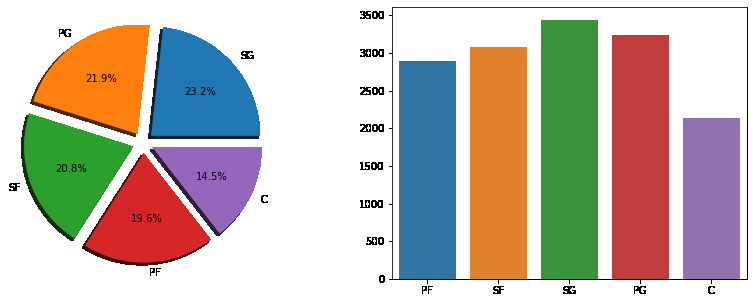

In [43]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
df['Pos'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('')

sns.countplot(x=df['Pos'], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.show()

- The centre position is less than the rest of the positions. However, the difference may not be significant enough to be an imbalance.

### 2.2 Position vs Features

In [44]:
def position(feature_1, feature_2, feature_3):
    plot, ax = plt.subplots(1, 3, figsize=(20,5))
    sns.pointplot(data=df, x='Pos', y=feature_1, ax = ax[0])
    sns.pointplot(data=df, x='Pos', y=feature_2, ax = ax[1])
    sns.pointplot(data=df, x='Pos', y=feature_3, ax = ax[2])
    plt.show()

In [45]:
def position_single(feature_1):
    plt.figure(figsize = (5,4))
    sns.pointplot(data=df, x='Pos', y=feature_1)
    plt.show()

**Games Played vs Position**

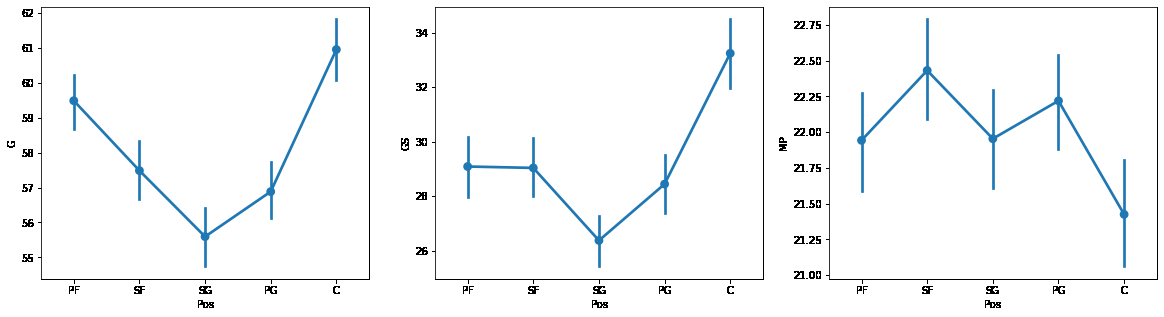

In [46]:
position('G', 'GS', 'MP')

- The centre starts the most games, and plays the most games alongisde the power forward, with the guards playing the least. The forwards are in between and close together.
- The centre plays the least minutes per game whereas the rest of the positions are fairly close, with the small forward playing the most. 

**Field Goal vs Position**

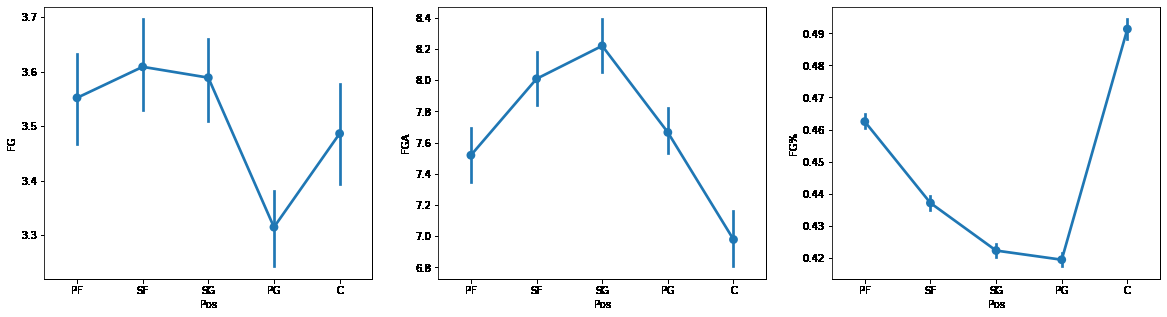

In [47]:
position('FG', 'FGA', 'FG%')

- The point guard makes the least amount of field goals, then the centre, then the rest of the positions close together.
- The shooting guard attempts the most field goals alongside the small forward as they are the primary scorers. The centre attempts the least.
- The field goal percentage is highest for the centre as their shots are usually next to the basket. The guards are the least as they usually jump shots further away from the basket i.e. three pointers.

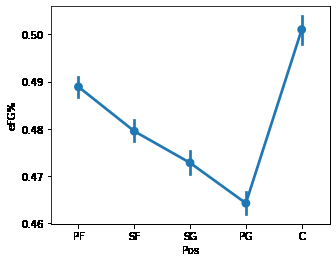

In [48]:
position_single('eFG%')

**Three Point vs Position**

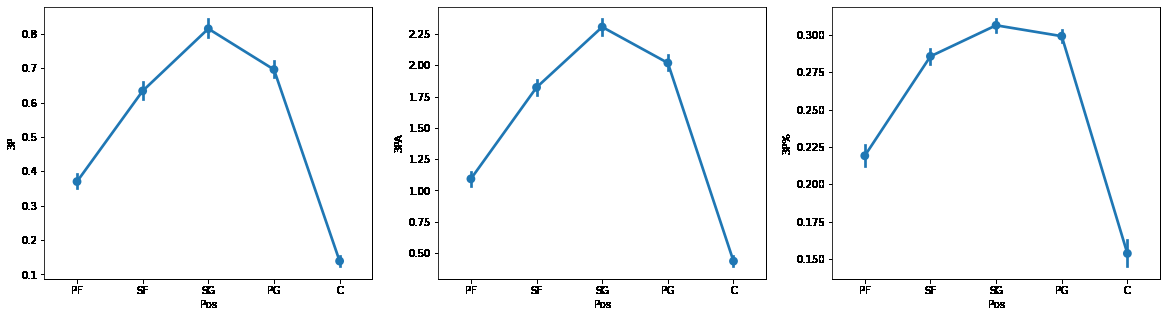

In [49]:
position('3P', '3PA', '3P%')

- The guards take the most and make the most three pointers. The small forward is not far behind.
- The power forward and centre take and make the least three pointers.

**Two Point vs Position**

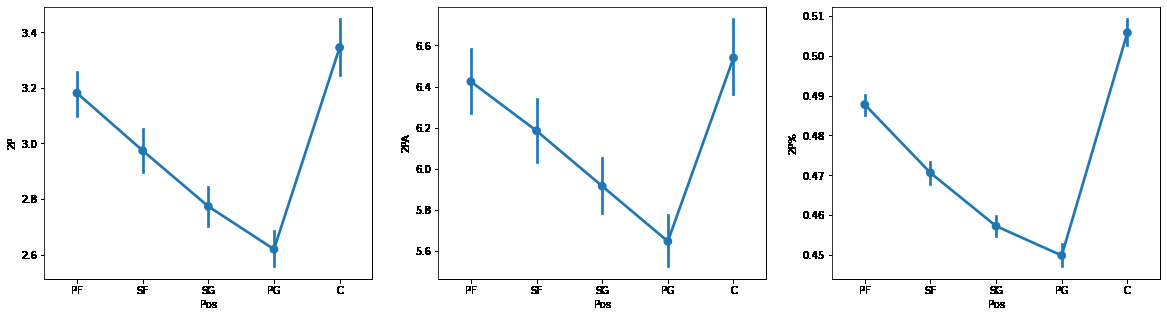

In [50]:
position('2P', '2PA', '2P%')

- Opposite to the three pointers.

**Free Throws vs Position**

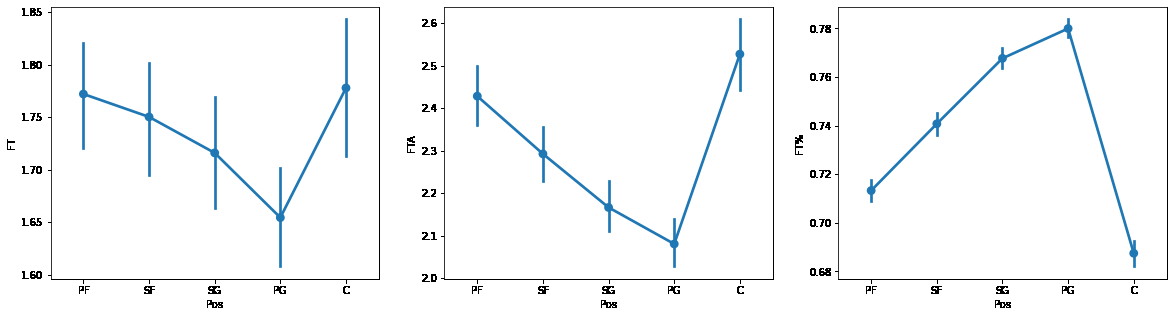

In [51]:
position('FT', 'FTA', 'FT%')

- The power forward and centre take the most free throws as they tend to score around the basket which results in contact and a foul.
- However, the guards make the most free throws as they shoot the best.

**Rebounding and Blocks vs Position**

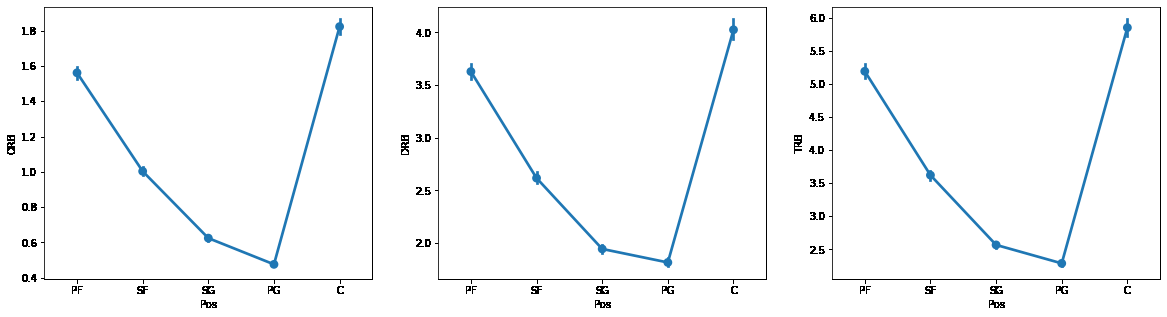

In [52]:
position('ORB', 'DRB', 'TRB')

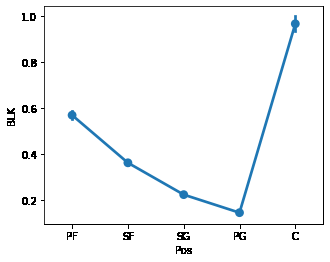

In [53]:
position_single('BLK')

- The power forward and centre defend around the basket because they are the tallest, so they would tend to get more rebounds and blocks.

**Assists, Steals and Turnovers vs Position**

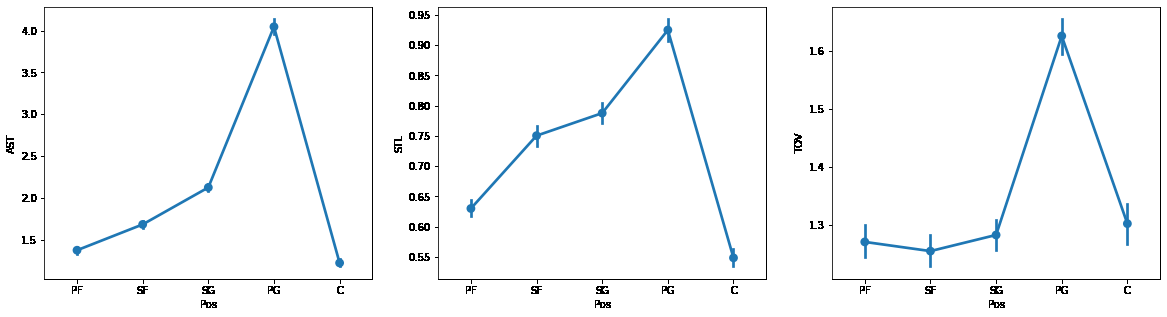

In [54]:
position('AST', 'STL', 'TOV')

- The point guard facilitates for the team so would have the most assists and as a result, turnovers as they are the ones making plays.
- The point guard has the most steals. It seems like smaller the player, the more likely they are to get a steal.

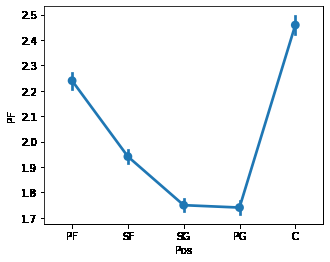

In [55]:
position_single('PF')

- The centre has the most personal fouls whereas the guards have the least.

**Points**

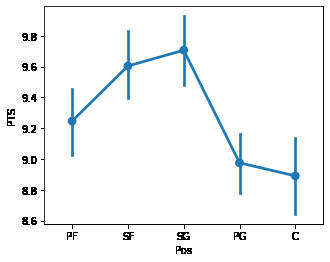

In [56]:
position_single('PTS')

- The shooting guard and small forward have the most points, whereas the centre and the point guard have the least. A point guard focuses on facilitating whereas a centre focuses on rebounding and inside scoring and the shootin guard and power forward focus on scoring.

**Age**

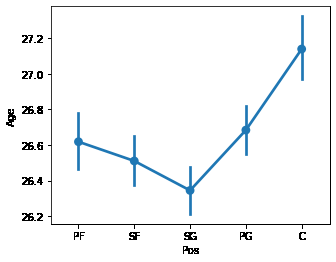

In [57]:
position_single('Age')

Conclusion: It seems the best way to group the positions are as stated in the introduction

### 2.3 Correlation


1. Point Guard
2. Shooting Guard
3. Small Forward
4. Power Forward
5. Centre

In [58]:
df['Pos'].unique()

array(['PF', 'SF', 'SG', 'PG', 'C'], dtype=object)

In [59]:
test = df.copy()
test['Pos'] = test['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4, 'C':5})

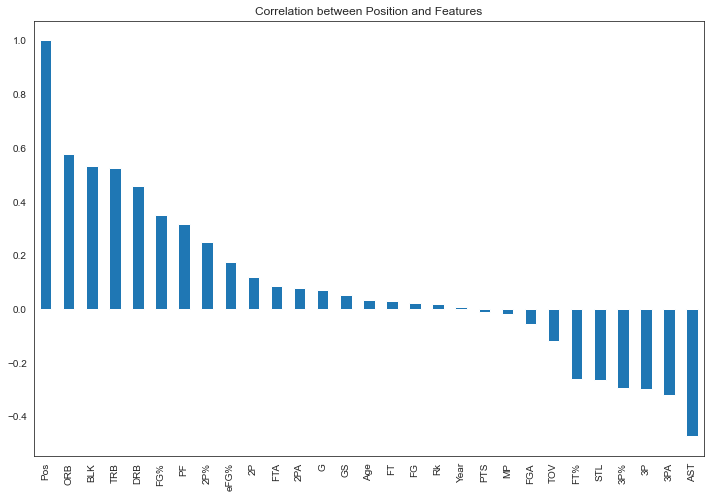

In [60]:
pos_correlation = test.corr()['Pos'].sort_values(ascending=False)

with sns.axes_style("white"):
    plt.figure(figsize=(12,8))
    pos_correlation.plot.bar()
    plt.title('Correlation between Position and Features')
    plt.show()

- It can be seen that as the position increases from 1-5, i.e. point guard to centre, the stats relating to defense such as rebounding, blocking as well as field goal percentage increase. However, offensive stats other than two pointers start to increase, such as field goal attempts, free throw percentage, three pointers and assists.

In [61]:
def histplots(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data=df, x=feature, binwidth=1, multiple = "stack").set_title(f"{feature}")
    plt.show()

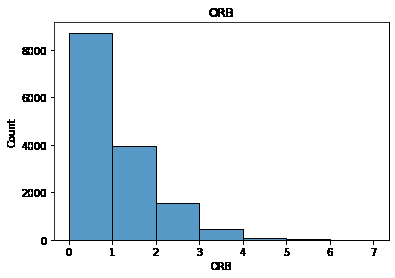

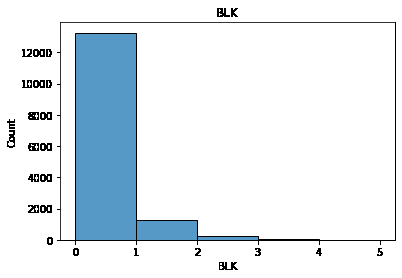

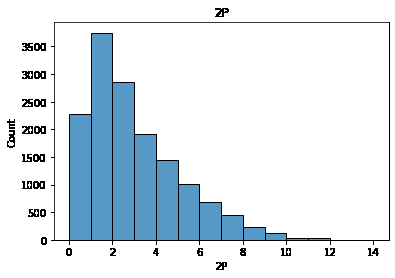

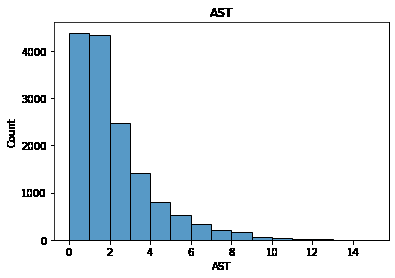

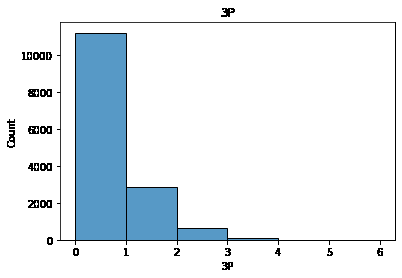

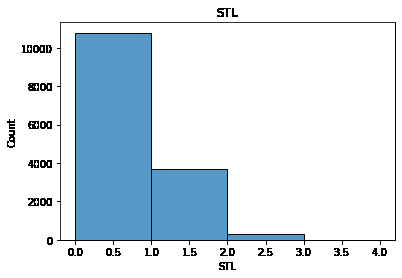

In [62]:
for col in ['ORB', 'BLK', '2P', 'AST', '3P', 'STL']:
    histplots(col)

- Right skewed data

## 3. Feature Engineering

### 3.1 Changing label into numerical data

In [63]:
# keep df before altering in case
data = df.copy()

In [64]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

**Group positions together**

- The point guard on its own as their primary goal is to facilitate and make the right plays.
- The shooting guard and small forward together as they focus on scoring although the shooting guard more further away form the basket.
- Power forward and centre together as their roles are similar.

In [65]:
df['Pos'] = df['Pos'].map({'PG':0, 'SG':1, 'SF':1, 'PF':2, 'C':2})

## 4. Modelling

In [66]:
import warnings
warnings.filterwarnings("ignore")

Hold out year 2022 to predict at the end:

In [67]:
df_2022 = df[df['Year'] == 2022]

In [68]:
df = df[df['Year'] != 2022]

### 4.1 Features vs Label

In [69]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

Drop:
- Rk
- Player
- Tm
- Year

Do not contribute to classifying position

In [70]:
label = 'Pos'
features = [
       'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA', '3P%', 
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'
]

In [71]:
X = df[features]
y = df[label]

In [72]:
X.shape, y.shape

((14276, 26), (14276,))

### 4.2 Normalizing data and removing outliers

The data needs to be normalized as the scaling of the variables are different i.e. points and percentages. 

In [73]:
def normalize_with_outliers(X, y):
    mu = X.describe().T['mean']
    sigma = X.describe().T['std']
    X_norm = (X-mu)/sigma
    
    total_outliers = []
    for col_name in X_norm.columns:
        outliers = X_norm[(X_norm[col_name] > 3) | (X_norm[col_name] < -3)]
        outlier_indexes = outliers.index
        X_norm = X_norm.drop(outlier_indexes)
        y = y.drop(outlier_indexes)
    return X_norm, y

In [74]:
X_norm, y = normalize_with_outliers(X, y)

In [75]:
X_norm.shape, y.shape

((12301, 26), (12301,))

### 4.3 Train/Test Split

In [76]:
X_train = X_norm
y_train = y

print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {y_train.shape}" )

X_train shape is = (12301, 26)
Y_train shape is = (12301,)


### 4.4 Model

In [77]:
random_state = 5
mymodels = {
                "Logistic":LogisticRegression(random_state=random_state),
                "KNN": KNeighborsClassifier(),
                "Gaussian": GaussianNB(),
                "DT": DecisionTreeClassifier(max_depth=10, random_state=random_state),
                "RF": RandomForestClassifier(n_estimators=50, random_state=random_state),
                "ADABoost": AdaBoostClassifier(random_state = random_state),
                "SVC": SVC(gamma = "auto"),
                "GradientBoost": GradientBoostingClassifier(random_state=random_state),
                "XGB": XGBClassifier(random_state = random_state)
            }

#### 4.4.1 Metrics

**Use cross validation to find mean score of a number of models**

In [78]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

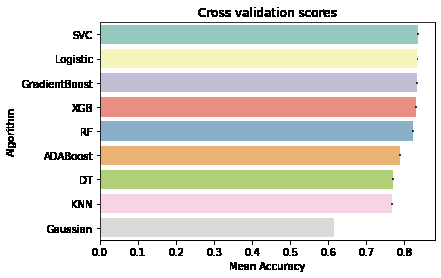

In [79]:
cv_results = []
for model_name, model in mymodels.items():
    cv_results.append(cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = kfold))
    
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Algorithm":mymodels.keys()
    })

cv_res = cv_res.sort_values('CrossValMeans', ascending=False)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

**Use classification report to evaluate precision, recall and f1-score of each model**

In [80]:
for model_name, model in mymodels.items():
    y_pred = cross_val_predict(model, X_train, y_train, cv = kfold)
    print('='*25 ,model_name, '='*25,  ' ')
    print(classification_report(y_train, y_pred))

========================= Logistic =========================  
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2634
           1       0.81      0.84      0.83      5666
           2       0.87      0.85      0.86      4001

    accuracy                           0.84     12301
   macro avg       0.84      0.83      0.83     12301
weighted avg       0.84      0.84      0.84     12301

========================= KNN =========================  
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2634
           1       0.74      0.79      0.76      5666
           2       0.84      0.78      0.81      4001

    accuracy                           0.77     12301
   macro avg       0.77      0.76      0.76     12301
weighted avg       0.77      0.77      0.77     12301

========================= Gaussian =========================  
              precision    recall  f1-score   support


#### 4.4.2 Modelling top classifiers

- SVC, Logistic, GradientBoost, RF

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9840, 26), (9840,), (2461, 26), (2461,))

**Logistic regression**

In [84]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [85]:
LR = LogisticRegression()

lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter' : [100, 200, 500]
}

gsLR = GridSearchCV(LR, param_grid=lr_param_grid, cv=kfold, verbose=1)
gsLR.fit(X_train, y_train)

LR_best= gsLR.best_estimator_
LR_best

Fitting 3 folds for each of 21 candidates, totalling 63 fits


LogisticRegression(C=10, max_iter=500)

In [86]:
LR = LR_best.fit(X_train, y_train)
lr_y_pred = LR.predict(X_test)
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       497
           1       0.81      0.85      0.83      1133
           2       0.88      0.84      0.86       831

    accuracy                           0.84      2461
   macro avg       0.84      0.83      0.84      2461
weighted avg       0.84      0.84      0.84      2461



**Random Forest**

In [87]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [88]:
RF = RandomForestClassifier()

rf_param_grid = {
        "criterion": ["gini","entropy"],
        "n_estimators": [10, 20, 30],
        "min_samples_leaf": [1, 2, 3],
        "min_samples_split": [3, 5, 10], 
        "max_features": ["sqrt", "log2"],
        "random_state": [2]
}

gsRF = GridSearchCV(RF, param_grid=rf_param_grid, cv=kfold, verbose=1)
gsRF.fit(X_train, y_train)

RF_best = gsRF.best_estimator_
RF_best

Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=5, n_estimators=30, random_state=2)

In [89]:
RF = RF_best.fit(X_train, y_train)
rf_y_pred = RF.predict(X_test)
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       497
           1       0.81      0.84      0.82      1133
           2       0.87      0.83      0.85       831

    accuracy                           0.83      2461
   macro avg       0.84      0.83      0.83      2461
weighted avg       0.84      0.83      0.83      2461



**Gradient boost**

In [90]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [91]:
GB = GradientBoostingClassifier()

gb_param_grid = {
    'n_estimators' : [25, 50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [1, 5],
}

gsGB = GridSearchCV(GB, param_grid=gb_param_grid, cv=kfold, n_jobs=-1, verbose=1)
gsGB.fit(X_train, y_train)

GB_best = gsGB.best_estimator_
GB_best

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [92]:
GB = GB_best.fit(X_train, y_train)
gb_y_pred = GB.predict(X_test)
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       497
           1       0.82      0.83      0.83      1133
           2       0.88      0.85      0.86       831

    accuracy                           0.84      2461
   macro avg       0.84      0.84      0.84      2461
weighted avg       0.84      0.84      0.84      2461



**SVC**

In [93]:
SVC = SVC()

svc_param_grid = {
    "C": [1, 5, 10, 15], 
    "kernel": ["linear","rbf"],
    "gamma": [0.5, 0.1, 0.001]
}

gsSVC = GridSearchCV(SVC, param_grid=svc_param_grid, cv=kfold, verbose=1)
gsSVC.fit(X_train, y_train)

SVC_best= gsSVC.best_estimator_
SVC_best

Fitting 3 folds for each of 24 candidates, totalling 72 fits


SVC(C=5, gamma=0.5, kernel='linear')

In [94]:
SVC = SVC_best.fit(X_train, y_train)
svc_y_pred = SVC.predict(X_test)
print(classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       497
           1       0.81      0.84      0.83      1133
           2       0.88      0.83      0.86       831

    accuracy                           0.84      2461
   macro avg       0.84      0.84      0.84      2461
weighted avg       0.84      0.84      0.84      2461



- Gradient Boost the best

### 4.5 Predictions

- Predict on 2022

In [95]:
df_2022.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
45,198,Aaron Gordon,2,26,DEN,75,75,31.7,5.8,11.1,0.520,1.2,3.5,0.335,4.6,7.7,0.605,0.573,2.3,3.1,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,2022
55,244,Aaron Holiday,0,25,PHO,63,15,16.2,2.4,5.4,0.447,0.6,1.6,0.379,1.8,3.7,0.477,0.504,0.9,1.1,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,2022
70,406,Aaron Nesmith,1,22,BOS,52,3,11.0,1.4,3.5,0.396,0.6,2.2,0.270,0.8,1.3,0.612,0.481,0.4,0.5,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,2022
71,581,Aaron Wiggins,1,23,OKC,50,35,24.2,3.1,6.7,0.463,0.8,2.8,0.304,2.3,4.0,0.573,0.525,1.2,1.7,0.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,2022
86,403,Abdel Nader,1,28,PHO,14,0,10.4,0.9,2.5,0.343,0.3,1.0,0.286,0.6,1.5,0.381,0.400,0.4,0.7,0.600,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4,2022


In [96]:
X_test = df_2022[features]
y_actual = df_2022[label]

In [97]:
def normalize(X):
    mu = X.describe().T['mean']
    sigma = X.describe().T['std']
    X_norm = (X-mu)/sigma
    return X_norm

X_test = normalize(X_test)

In [98]:
SVC = SVC_best.fit(X_train, y_train)
svc_y_pred = SVC.predict(X_test)
y_pred = pd.DataFrame(svc_y_pred, columns=['prediction'], index=X_test.index)

In [99]:
y_pred

,prediction
45,1
55,0
70,1
71,1
86,1
...,...
14710,2
14718,1
14736,0
14751,2


In [100]:
prediction = pd.DataFrame(df_2022, index=y_pred.index)

In [101]:
prediction['prediction'] = y_pred

In [102]:
prediction = prediction[['Player', 'Pos', 'prediction']]

In [103]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       101
           1       0.70      0.82      0.75       236
           2       0.85      0.70      0.77       183

    accuracy                           0.76       520
   macro avg       0.78      0.74      0.76       520
weighted avg       0.77      0.76      0.76       520



- Predicting 1, the shooting guard, was the most incorrect.

### 4.6 Evaluation

In [104]:
prediction

,Player,Pos,prediction
45,Aaron Gordon,2,1
55,Aaron Holiday,0,0
70,Aaron Nesmith,1,1
71,Aaron Wiggins,1,1
86,Abdel Nader,1,1
...,...,...,...
14710,Zach Collins,2,2
14718,Zach LaVine,1,1
14736,Zavier Simpson,0,0
14751,Zeke Nnaji,2,2


In [105]:
prediction[prediction['Pos'] != prediction['prediction']]

,Player,Pos,prediction
45,Aaron Gordon,2,1
107,Admiral Schofield,1,2
263,Alex Caruso,1,0
299,Alfonzo McKinnie,1,2
626,Anfernee Simons,1,0
...,...,...,...
14252,Victor Oladipo,1,0
14363,Vlatko Čančar,2,1
14606,Willie Cauley-Stein,2,1
14672,Xavier Moon,1,0


In [106]:
prediction[prediction['Pos'] != prediction['prediction']]['Pos'].value_counts()

2    55
1    42
0    29
Name: Pos, dtype: int64

In [107]:
prediction[prediction['Pos'] != prediction['prediction']]['prediction'].value_counts()

1    84
2    23
0    19
Name: prediction, dtype: int64

- Centre was predicted wrong the most for the forward position, probably the power forward as explained in the beginning, the roles have a lot of similarities.

In [108]:
prediction[(prediction['Pos'] != prediction['prediction']) & (prediction['Pos'] == 2) ]

,Player,Pos,prediction
45,Aaron Gordon,2,1
1348,Bojan Bogdanović,2,1
1351,Bol Bol,2,1
1898,Cameron Johnson,2,1
2544,Chuma Okeke,2,1
2846,D.J. Wilson,2,1
3057,Danilo Gallinari,2,1
3511,DeMar DeRozan,2,1
3557,Dean Wade,2,1
4151,Dorian Finney-Smith,2,1


In [109]:
prediction[(prediction['Pos'] != prediction['prediction']) & (prediction['Pos'] == 2) ]['prediction'].value_counts()

1    55
Name: prediction, dtype: int64

- The power forward or centre has always been predicted as a shooting guard. Most likely the power forward.

In [110]:
prediction[(prediction['Pos'] != prediction['prediction']) & (prediction['Pos'] == 0)]

,Player,Pos,prediction
871,Armoni Brooks,0,1
1502,Brandon Knight,0,1
1521,Brandon Williams,0,1
2640,Coby White,0,1
2875,Dalano Banton,0,1
3366,David Duke Jr.,0,1
3466,De'Aaron Fox,0,1
3842,Derrick Rose,0,1
3912,Devin Cannady,0,1
4267,Duane Washington Jr.,0,1


In [111]:
prediction[(prediction['Pos'] != prediction['prediction']) & (prediction['Pos'] == 0) ]['prediction'].value_counts()

1    29
Name: prediction, dtype: int64

- The point guard has always been predicted as the shooting guard. This role can sometimes be interchangeable as some point guards and shooting guards switch positions at times.

---
- ORB, BLK, PF : Centre best stats
- AST, 3PA, FT% : Guard best stats

In [117]:
df_2022['best_centre'] = df_2022['ORB'] * df_2022['BLK'] * df_2022['PF']
df_2022['best_guard'] = df_2022['AST'] * df_2022['3PA'] * df_2022['FT%']

<AxesSubplot:xlabel='best_centre', ylabel='best_guard'>

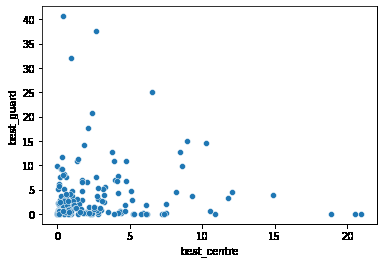

In [118]:
sns.scatterplot(x='best_centre', y='best_guard', data=df_2022[df_2022['Pos'] == 2])

<AxesSubplot:xlabel='best_centre', ylabel='best_guard'>

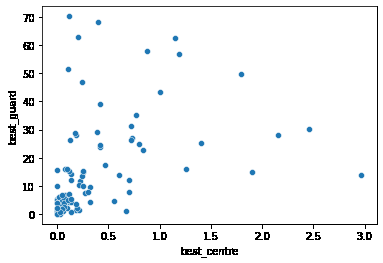

In [114]:
sns.scatterplot(x='best_centre', y='best_guard', data=df_2022[df_2022['Pos'] == 0])

- You can see the spread of the centres and guards when it comes to their stats. A lot of players do more than their traditional roles and hence, play more like other roles in their current role.

- Take for instance DeMar DeRozan from the predictions. He was predicted to be a centre but is in fact a forward, more specifically a power forward in 2022.

In [115]:
demar = data[data['Player'] == 'DeMar DeRozan']
demar['best_centre'] = demar['ORB'] * demar['BLK'] * demar['PF']
demar['best_guard'] = demar['AST'] * demar['3PA'] * demar['FT%']
demar[['Pos', 'Year', 'best_centre', 'best_guard']]

,Pos,Year,best_centre,best_guard
3499,SG,2010,0.414,0.10682
3500,SG,2011,0.936,0.87804
3501,SG,2012,0.468,2.43000
3502,SG,2013,0.378,3.11625
3503,SG,2014,0.600,8.89920
3504,SG,2015,0.280,4.36800
3505,SG,2016,0.504,6.12000
3506,SG,2017,0.324,5.58246
3507,SG,2018,0.399,15.44400
3508,SG,2019,0.805,3.08760


<AxesSubplot:xlabel='best_centre', ylabel='best_guard'>

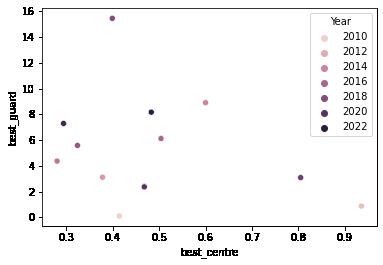

In [116]:
sns.scatterplot(x='best_centre', y='best_guard', hue='Year', data=demar)

- You can see how his stats in itself varies over the years for the position that he was labeled at. Hence, some positions will be intrinsically hard to predict just by this nature.

- Some players are labelled a position but in reality play another positions play style and perhaps teams just try to put the best players on the court at the same time.

- Some players just play multiple positions and some players can play all positions. The traditional position nowadays do not fit a lot of player so it would be hard to predict what class they belong in.

- One way of perhaps improving the model is to include more advanced statistics like touches on the ball, usage rate, etc.

**END**